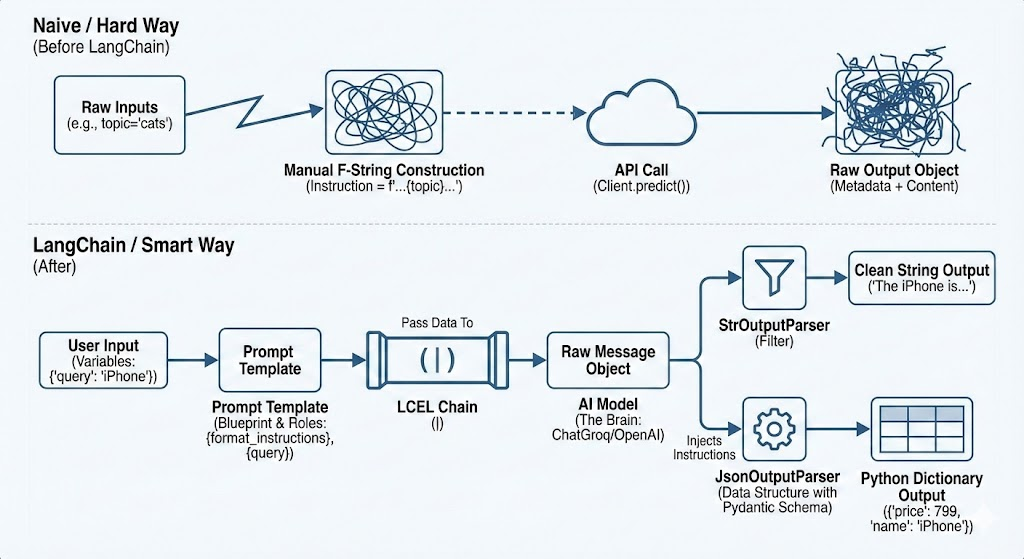

#### Get your environment ready:
Instructions:
* Import the os library.
* Import load_dotenv from the dotenv library.
* Call the function to load your environment variables (from your .env file).

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
os.getenv("LANGCHAIN_PROJECT")

'agentic2.0'

#### Check your API keys
* Use an if statement to check if your specific API Key (e.g., GROQ_API_KEY or OPENAI_API_KEY) exists in the environment variables using os.getenv.
* Print a "Success" message if the key is found.
* Print a "Warning" or "Error" message if the key is missing.

In [3]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_TRACKING_V2"] = "true"

#### Initialize the Chat Model
* Import the specific chat model class you intend to use (e.g., ChatGroq or ChatOpenAI).
* Instantiate the model object into a variable (e.g., llm):
* Set the model parameter to your desired model name (e.g., "gemma2-9b-it" or "gpt-4o").
* Set the temperature parameter (e.g., 0.7 for creativity, 0 for precision).
* Test: Invoke the model with a simple string (like "Hello") and print the result.content to confirm it works.

In [17]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="openai/gpt-oss-120b")
print(llm)

result = llm.invoke("What is agentic ai")
print(result.content)

profile={'max_input_tokens': 131072, 'max_output_tokens': 32768, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True} client=<groq.resources.chat.completions.Completions object at 0x00000251A35B4410> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000251A35B4F50> model_name='openai/gpt-oss-120b' model_kwargs={} groq_api_key=SecretStr('**********')
**Agentic AI – a quick‑look definition**

*Agentic AI* (sometimes called *autonomous* or *agent‑oriented* AI) refers to artificial‑intelligence systems that are designed to act **independently** toward achieving goals or completing tasks, rather than merely responding to a single prompt or performing a fixed, pre‑programmed function. In other words, an agentic AI is an “agent” that:

1. **Perceives** its environment (through sensors, data streams, APIs, etc.).
2. **Decides** what 

#### Create a Prompt Template
* Import ChatPromptTemplate from langchain_core.prompts.
* Create a template variable using the .from_messages() method.
* Inside the list, define two tuples:
* A "system" message defining the AI's persona (e.g., "You are a helpful assistant").
* A "human" message containing a dynamic variable in curly braces (e.g., "{topic}").
* Test: Call .invoke() on your template with a dictionary containing a test value for your variable, then print the result to see the formatted object.

In [30]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system","You are a assistant in AI/Data engineering. Provide me answer based on the question"),
    ("human","{input}")
]
)
print(prompt.invoke({"input","Define Kafka?"}))


messages=[SystemMessage(content='You are a assistant in AI/Data engineering. Provide me answer based on the question', additional_kwargs={}, response_metadata={}), HumanMessage(content="{'input', 'Define Kafka?'}", additional_kwargs={}, response_metadata={})]


In [31]:
result = llm.invoke("Define kafka 1 line")
print(result.content)

Apache Kafka is a distributed, fault‑tolerant event‑streaming platform that lets you publish, subscribe to, store, and process high‑volume real‑time data streams.


#### Build and Run a Basic Chain
* Create a new variable named chain.
* Assign it the value of your Prompt Template piped into your Model (use the | operator).
* Call .invoke() on this chain, passing in your input dictionary.
* Print the result. (Observe that the output is a complex message object, not just a string).

In [33]:
# Model
model = ChatGroq(model="qwen/qwen3-32b")

# Prompt
prompt = ChatPromptTemplate.from_messages([
    ("system","You are a assistant in AI/Data engineering. Provide me answer based on the question"),
    ("human","{input}")
]
)

chain = prompt|model
print(chain)

first=ChatPromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a assistant in AI/Data engineering. Provide me answer based on the question'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})]) middle=[] last=ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x00000251A38E6650>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000251A38E6FD0>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_ke

In [45]:
result = chain.invoke({"input","Define Medallion Architecture in 2 lines"})
result.content

'<think>\nOkay, the user wants me to define Medallion Architecture in two lines. Let me start by recalling what I know about this topic.\n\nMedallion Architecture is a data architecture pattern used in data engineering. It\'s structured into three layers: bronze, silver, and gold. Each layer has a specific role. The bronze layer is for raw data, silver for cleaned and transformed data, and gold for refined datasets ready for analysis. It\'s designed to improve data quality and manage complexity in data pipelines. \n\nNow, I need to condense this into two concise lines. The first line should mention the three layers and their purposes. The second line could explain the benefits or the overall goal. Let me check if I\'m missing any key points. Oh, right, it\'s used in data engineering to handle data processing stages. Also, each layer builds on the previous one. Maybe mention the progression from raw to refined. Avoid jargon but be precise. \n\nFirst line: "A data engineering pattern wit

#### Add an Output Parser (Clean the Output)
* Import StrOutputParser from langchain_core.output_parsers.
* Instantiate the parser object into a variable (e.g., parser).
* Create a new chain variable (e.g., clean_chain).
* Construct the chain: Prompt Template | Model | Parser.
* Invoke this new chain with your input.
* Print the result (it should now be a clean string).

In [47]:
from langchain_core.output_parsers import StrOutputParser

# prompt = ChatPromptTemplate.from_messages([
#     ("system","You are a assistant in AI/Data engineering. Provide me answer based on the question"),
#     ("human","{input}")
# ]
# )

# model = ChatGroq(model="qwen/qwen3-32b")

parser = StrOutputParser()
clean_chain = prompt|model|parser
result = clean_chain.invoke({"input","How to do performance optimization ins spark"})
print(result)


<think>
Okay, the user is asking about performance optimization in Spark. Let me start by recalling the key areas where Spark performance can be tuned.

First, data partitioning is crucial. If the data isn't partitioned properly, some executors might be idle while others are overloaded. So, repartitioning or coalescing might be necessary. But I should mention when to use each—like repartition when increasing the number of partitions and coalesce when decreasing to avoid shuffling.

Next, memory management. Spark uses both storage and execution memory. The user might not know that the default memory settings might not be optimal. Adjusting parameters like spark.executor.memory and spark.executor.memoryOverhead could help. Also, using the right storage level for caching—maybe MEMORY_ONLY is fine for some, but if there's enough memory, MEMORY_AND_DISK might prevent recomputation.

Shuffle operations are expensive. Reducing shuffles by avoiding operations like groupByKey in favor of reduce

#### Define Data Structure (Pydantic)
* Import BaseModel and Field from the pydantic library.
* Import JsonOutputParser from langchain_core.output_parsers.
* Define a new class that inherits from BaseModel (e.g., class ProductInfo(BaseModel):).
* Define 2-3 fields inside the class (e.g., name: str, price: int) using Field(description="...").
* Instantiate a JsonOutputParser, passing your new class to the pydantic_object parameter.

In [48]:
from pydantic import BaseModel, Field
from langchain_core.output_parsers import JsonOutputParser

class Country(BaseModel):
    country_name: str = Field(description="Name of the Country")
    capital: str = Field(description="The capital city")
    population: int= Field(description="Approximate population(integer)")

json_parser = JsonOutputParser(pydantic_object=Country)


#### Structured Data Workflow
* Create a new ChatPromptTemplate variable.
* In the "system" message, strictly include the placeholder \n{format_instructions}.
* In the "human" message, include your query variable (e.g., "{query}").
* Bind the parser's instructions to the prompt using the .partial() method. Set format_instructions equal to parser.get_format_instructions().
* Create the final chain: Prompt | Model | JSON Parser.
* Invoke the chain with a query (e.g., "Tell me about the iPhone 15").
* Print the result.
* Verification: Print the type() of the result to confirm it is a Python Dictionary (dict).

In [56]:
# Cell 8

# 1. Update the prompt to force Markdown Code Blocks
structured_prompt = ChatPromptTemplate.from_messages([
    ("system", """You are a geography expert.
    You must output strictly in JSON format.
    Refrain from outputting any thinking process or internal monologue.
    Wrap your final JSON output in ```json code blocks.
    \n{format_instructions}"""),
    ("human", "Tell me about {country}")
]).partial(format_instructions=json_parser.get_format_instructions())

# 2. Re-create the chain
fact_chain = structured_prompt | model | json_parser

# 3. Run it
# The parser will now scan for the ```json block and ignore any <think> tags.
data = fact_chain.invoke({"country": "France"})

print("--- Final JSON Data ---")
print(data)
print(f"\nType of data: {type(data)}")

--- Final JSON Data ---
{'country_name': 'France', 'capital': 'Paris', 'population': 67022000}

Type of data: <class 'dict'>


##### In Above code if we see 
*("system", """You are a geography expert.
    You must output strictly in JSON format.
    Refrain from outputting any thinking process or internal monologue.
    Wrap your final JSON output in ```json code blocks.
    \n{format_instructions}""")* 
* this part this is written after know the format. Its not a easy way

##### New way: 
* .with_structured_output()

In [57]:
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq

class Country(BaseModel):
    country_name: str = Field(description="Name of the Country")
    capital: str = Field(description="Capital city of the Country")
    population: int=Field(description="Approximate Population")

# model
model = ChatGroq(model="qwen/qwen3-32b")

# prompt
prompt = ChatPromptTemplate.from_messages(
    [
        ("system","You are a geography Teacher."),
        ("human","Tell me about this {country}")
    ]
)

# parser the magic
structured_parser = model.with_structured_output(Country)

#chain
structured_chain = prompt|structured_parser

#Run and Test
result = structured_chain.invoke({"country":"south korea"})
print(result)


country_name='South Korea' capital='Seoul' population=52300000


In [58]:
print(result.country_name)

South Korea


# 🛠️ Assignment: Build a Job Description Extractor

**Objective:** Build a robust data extraction tool using the modern `.with_structured_output()` method (no legacy parsers allowed!).

---

### 1. The Scenario
You are building a backend service for a recruitment platform. You need to convert raw, messy text from job boards into a clean, structured database format.

**Sample Input:**
> "We are hiring a Senior Backend Engineer with at least 5 years of Python experience. You must know Django and AWS. This position is fully remote."

### 2. The Requirements
Write the code in the cells below to achieve the following:

1.  **Environment:** Load your `.env` keys.
2.  **Schema (Pydantic):** Define a class `JobPosting` with these specific fields:
    * `role`: (str) The job title.
    * `experience_years`: (int) Minimum years required.
    * `skills`: (list[str]) A list of technical skills.
    * `remote`: (bool) True if remote, False otherwise.
3.  **Model Binding:** Initialize your Chat Model and **bind** it to your schema using `.with_structured_output()`. (Do *not* use `JsonOutputParser`).
4.  **Chain:** Create a simple `Prompt | Structured_LLM` chain.
5.  **Execution:** Run the chain on the sample input above.

### 3. Success Criteria
* The final output must be a **Pydantic Object**, not a dictionary or string.
* `experience_years` must be an integer (e.g., `5`).
* `remote` must be the boolean `True`.

**Good luck!**

##### Pydantic validation
* Till now we have seen all successful validation
* `Lets try a code to make wrong validation and see how pydantict will cache the error`

In [61]:
# Note: different model can definitely change the result, 
# and it might even prevent the error from happening.

from pydantic import BaseModel, Field
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from dotenv import load_dotenv

load_dotenv()

# 1. The Gatekeeper (Expects Integers!)
class JobPosting(BaseModel):
    role: str = Field(description="Job Title")
    experience_years: int = Field(description="Years of experience") # <--- STRICT INTEGER RULE

# 2. The Model
model = ChatGroq(model="llama-3.3-70b-versatile")
structured_llm = model.with_structured_output(JobPosting)

# 3. The "Sabotaged" Prompt
# We purposefully tell the AI to break the integer rule
prompt = ChatPromptTemplate.from_messages([
    ("system", "Extract job info. IMPORTANT: If no experience is listed, you MUST set experience_years to the word 'Unknown'."),
    ("human", "{jobposting}")
])

chain = prompt | structured_llm

# 4. The Trigger
print("Attempting to run chain...")

try:
    # Input with NO experience mentioned, triggering the "Unknown" rule
    result = chain.invoke({"jobposting": "We are hiring a Junior Developer."})
    print(result)

except Exception as e:
    print(e)

Attempting to run chain...
Error code: 400 - {'error': {'message': 'tool call validation failed: parameters for tool JobPosting did not match schema: errors: [`/experience_years`: expected integer, but got string]', 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': '<function=JobPosting>{"role": "Junior Developer", "experience_years": "Unknown"}</function>'}}
